In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
# Setting the original name to the column of the dataset
df.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

## Data Preprocessing

In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
#Convertig numeric features of object type into numeric type
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors ='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
cat_var = [var for var in df.columns if df[var].dtypes=='O']
cat_var

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [11]:
num_var = [var for var in df.columns if df[var].dtypes!='O']
num_var

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
# list unique values in each categorical columns
for var in cat_var:
    print('{} has {}\n'.format(var, pd.unique(df[var])))

red_blood_cells has [nan 'normal' 'abnormal']

pus_cell has ['normal' 'abnormal' nan]

pus_cell_clumps has ['notpresent' 'present' nan]

bacteria has ['notpresent' 'present' nan]

hypertension has ['yes' 'no' nan]

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]

coronary_artery_disease has ['no' 'yes' '\tno' nan]

appetite has ['good' 'poor' nan]

peda_edema has ['no' 'yes' nan]

aanemia has ['no' 'yes' nan]

class has ['ckd' 'ckd\t' 'notckd']



In [13]:
# replacing inconsistent data in target column
df = df.replace(to_replace='ckd\t', value='ckd')
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [14]:
# # replacing inconsistent data in diabetes_mellitus column
df = df.replace(to_replace='\tno', value='no')
df = df.replace(to_replace='\tyes', value='yes')
df = df.replace(to_replace=' yes', value='yes')
df['diabetes_mellitus'].value_counts()

no     261
yes    137
Name: diabetes_mellitus, dtype: int64

In [15]:
df['coronary_artery_disease'].value_counts()

no     364
yes     34
Name: coronary_artery_disease, dtype: int64

In [16]:
for var in cat_var:
    print(var)

red_blood_cells
pus_cell
pus_cell_clumps
bacteria
hypertension
diabetes_mellitus
coronary_artery_disease
appetite
peda_edema
aanemia
class


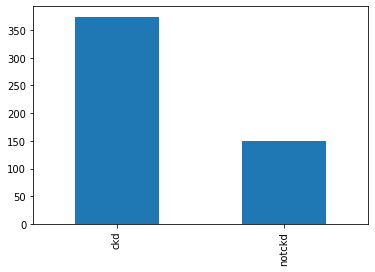

In [17]:
# visualizing the data in categorical columns
for var in cat_var:
    df[var].value_counts().plot(kind='bar')

In [18]:
np.arange(50,500,50)

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])

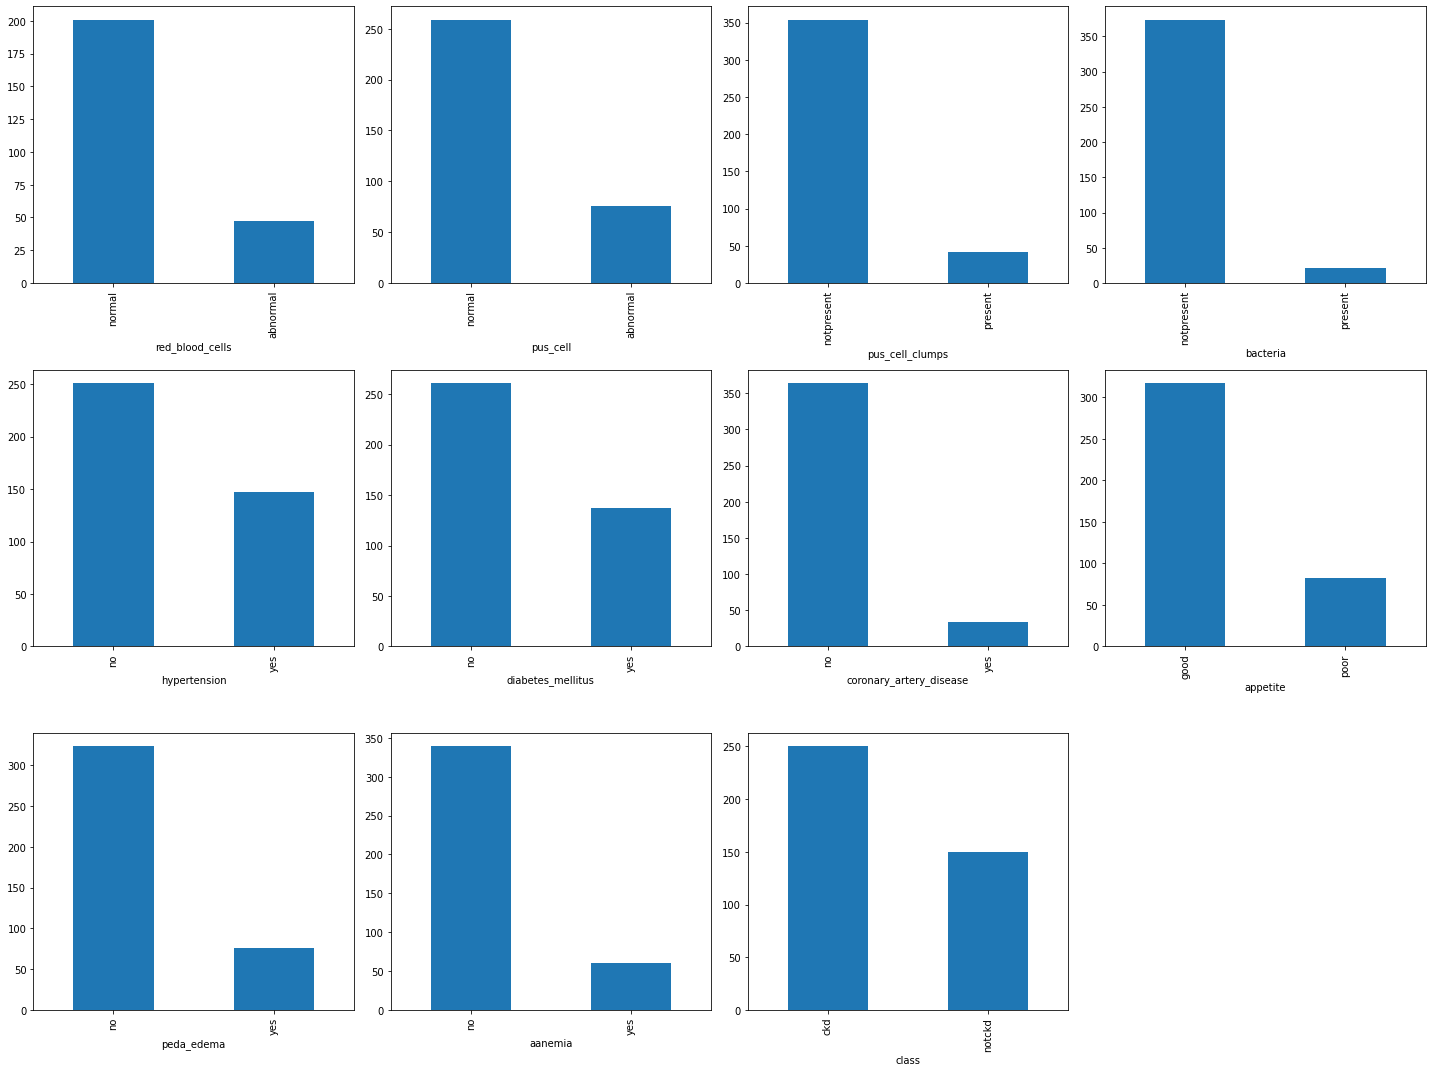

In [19]:
# visualize categorical data distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for var in cat_var:
    if plotnumber <= len(cat_var):
        ax = plt.subplot(3, 4, plotnumber)
        df[var].value_counts().plot(kind='bar', stacked=True)
        plt.xlabel(var)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

C:\Users\poude\anaconda3\envs\tfEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\poude\anaconda3\envs\tfEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\poude\anaconda3\envs\tfEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

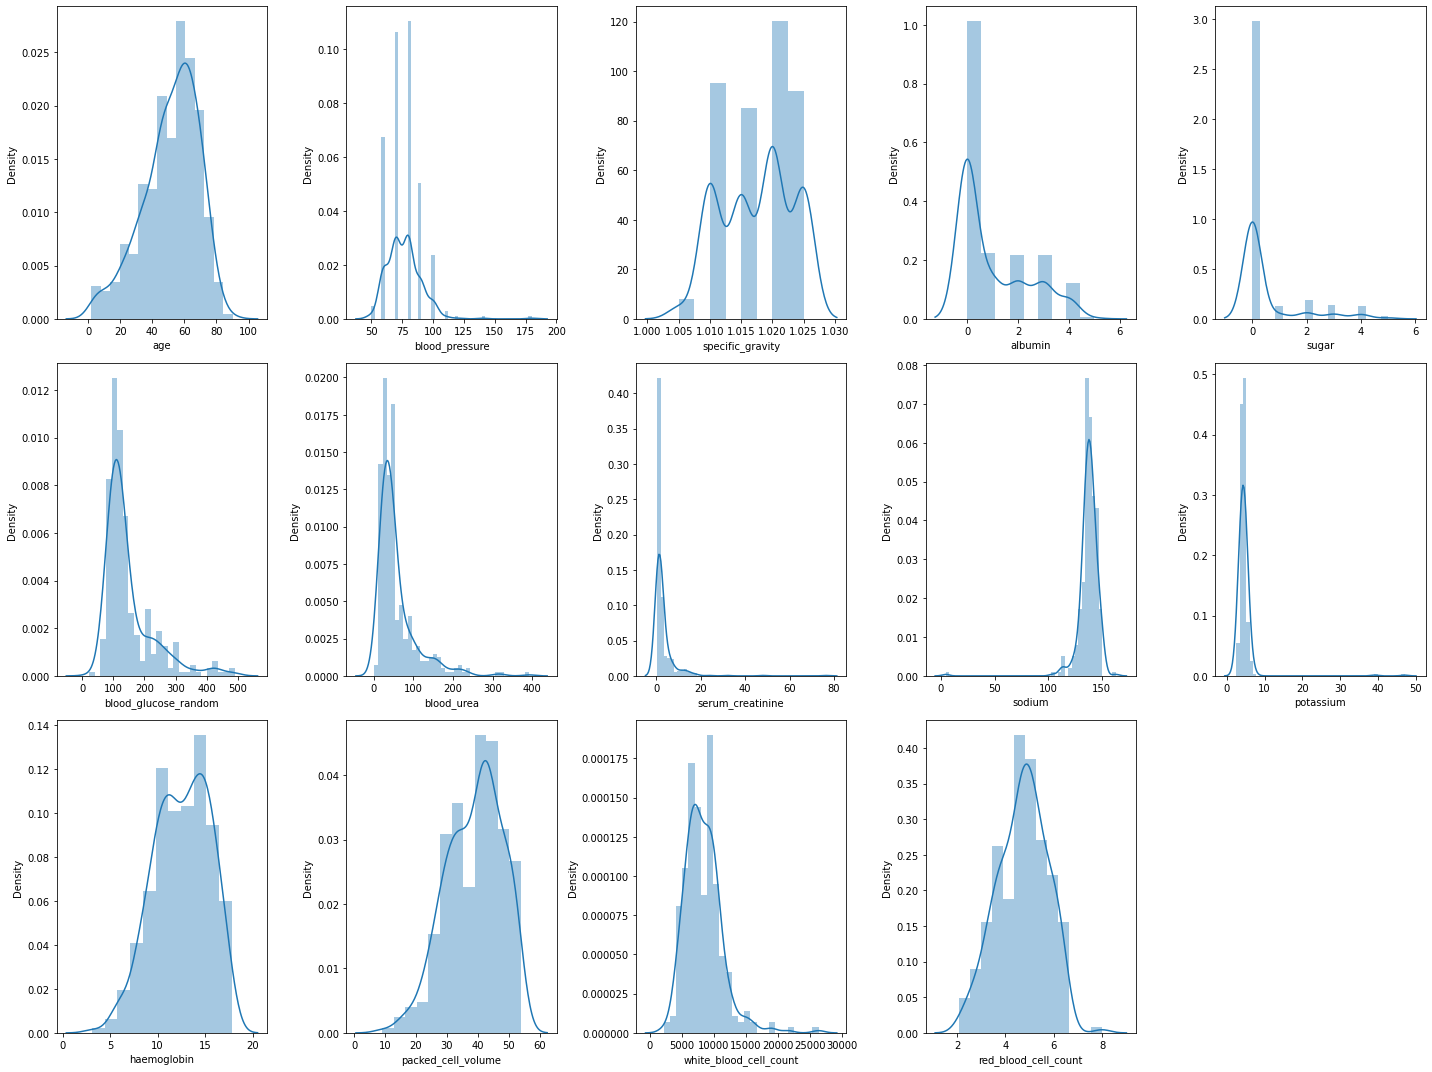

In [20]:
# numerical feature distribution
import seaborn as sns
plt.figure(figsize = (20, 15))
plotnumber = 1
for var in num_var:
    if plotnumber <= len(num_var):
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[var])
        plt.xlabel(var)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()


<AxesSubplot:>

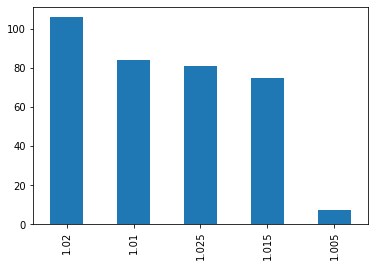

In [21]:
df['specific_gravity'].value_counts().plot(kind='bar')

<AxesSubplot:>

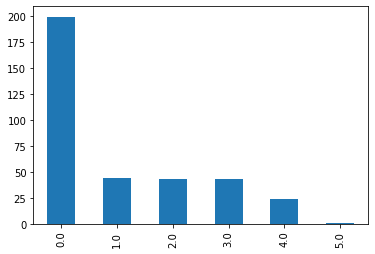

In [22]:
df['albumin'].value_counts().plot(kind='bar')

<AxesSubplot:>

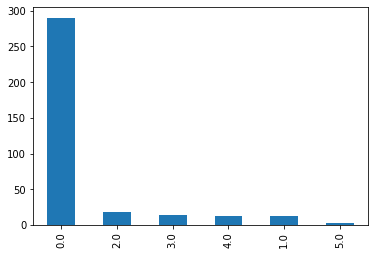

In [23]:
df['sugar'].value_counts().plot(kind='bar')

In [24]:
df[cat_var].isna().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [25]:
df[num_var].isna().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [26]:
# calculate the percentage of missing data
for col in df.columns:
    per_of_missing_data = np.mean(df[col].isna())
    print('{} has {}% of missing data\n'.format(col, round(per_of_missing_data*100)))

age has 2% of missing data

blood_pressure has 3% of missing data

specific_gravity has 12% of missing data

albumin has 12% of missing data

sugar has 12% of missing data

red_blood_cells has 38% of missing data

pus_cell has 16% of missing data

pus_cell_clumps has 1% of missing data

bacteria has 1% of missing data

blood_glucose_random has 11% of missing data

blood_urea has 5% of missing data

serum_creatinine has 4% of missing data

sodium has 22% of missing data

potassium has 22% of missing data

haemoglobin has 13% of missing data

packed_cell_volume has 18% of missing data

white_blood_cell_count has 26% of missing data

red_blood_cell_count has 33% of missing data

hypertension has 0% of missing data

diabetes_mellitus has 0% of missing data

coronary_artery_disease has 0% of missing data

appetite has 0% of missing data

peda_edema has 0% of missing data

aanemia has 0% of missing data

class has 0% of missing data



## Imputing numeric data

### Age

In [27]:
df1 = df.copy()

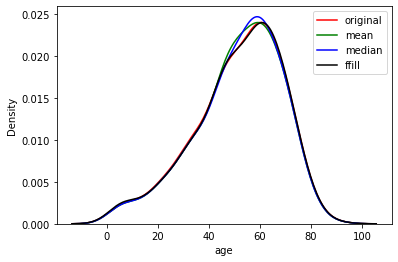

In [28]:
df1['age_mean_impt'] = df1.age.fillna(df1.age.mean())
df1['age_median_impt'] = df1.age.fillna(df1.age.median())
df1['ffill_age'] = df1.age.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['age'], color='red', label='original')
sns.kdeplot(df1['age_mean_impt'], color='green', label='mean')
sns.kdeplot(df1['age_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_age'], color='black', label='ffill')
plt.legend()

In the kde plot the last imputation techique `ffill` is depicting the `probability density funtion` of the variable age more congruently, so it is best suited imputation method for this column and now we'll use it in the original data.

In [29]:
df['age'] = df1['ffill_age']

### blood_pressure

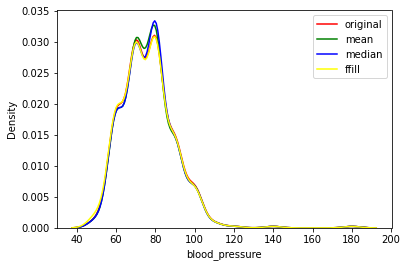

In [30]:
df1['bp_mean_impt'] = df1.blood_pressure.fillna(df1.blood_pressure.mean())
df1['bp_median_impt'] = df1.blood_pressure.fillna(df1.blood_pressure.median())
df1['ffill_bp'] = df1.blood_pressure.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['blood_pressure'],color='red',label='original')
sns.kdeplot(df1['bp_mean_impt'], color='green', label='mean')
sns.kdeplot(df1['bp_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_bp'], color='yellow', label='ffill')
plt.legend()

Here too `ffill` is depicting the `probability density funtion` of the variable blood_pressure more congruently, so it will be used in the original data.

In [31]:
df['blood_pressure'] = df1['ffill_bp']

### serum_creatinine

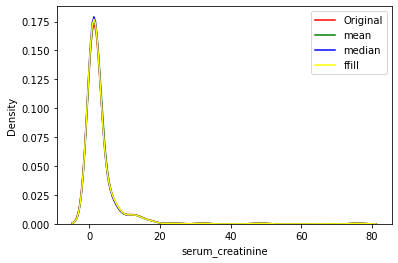

In [32]:
df1['sc_mean_impt'] = df1.serum_creatinine.fillna(df1.serum_creatinine.mean())
df1['sc_median_impt'] = df1.serum_creatinine.fillna(df1.serum_creatinine.median())
df1['ffil_sc'] = df1.serum_creatinine.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['serum_creatinine'],color='red',label='Original')
sns.kdeplot(df1['sc_mean_impt'], color='green', label='mean')
sns.kdeplot(df1['sc_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffil_sc'], color='yellow', label='ffill')
plt.legend()

In [33]:
df['serum_creatinine'] = df1['sc_mean_impt']

### blood_urea

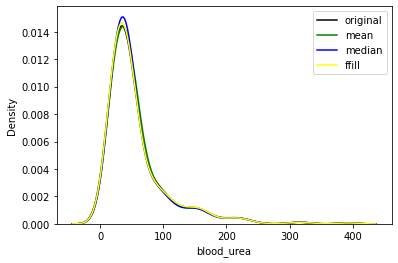

In [34]:
df1['bu_mean_impt'] = df1.blood_urea.fillna(df1.blood_urea.mean())
df1['bu_median_impt'] = df1.blood_urea.fillna(df1.blood_urea.median())
df1['ffill_bu'] = df1.blood_urea.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['blood_urea'],color='black',label='original')
sns.kdeplot(df1['bu_mean_impt'], color='green', label='mean')
sns.kdeplot(df1['bu_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_bu'], color='yellow', label='ffill')
plt.legend()

In [35]:
df['blood_urea'] = df1['bu_mean_impt']

### blood_glucose_random

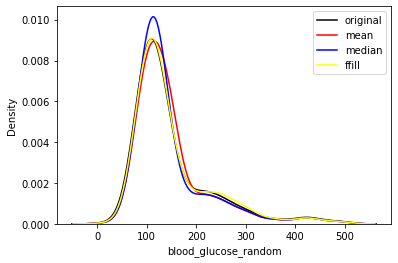

In [36]:
df1['bgr_mean_impt'] = df1.blood_glucose_random.fillna(df1.blood_glucose_random.mean())
df1['bgr_median_impt'] = df1.blood_glucose_random.fillna(df1.blood_glucose_random.median())
df1['ffill_bgr'] = df1.blood_glucose_random.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['blood_glucose_random'],color='black',label='original')
sns.kdeplot(df1['bgr_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['bgr_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_bgr'], color='yellow', label='ffill')
plt.legend()

In [37]:
df['blood_glucose_random'] = df1['ffill_bgr']

### albumin

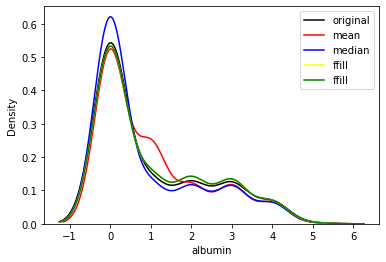

In [38]:
df1['al_mean_impt'] = df1.albumin.fillna(df1.albumin.mean())
df1['al_median_impt'] = df1.albumin.fillna(df1.albumin.median())
df1['ffill_al'] = df1.albumin.fillna(method='ffill')
df1['ffill_al_new'] = df1.albumin.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['albumin'],color='black',label='original')
sns.kdeplot(df1['al_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['al_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_al'], color='yellow', label='ffill')
sns.kdeplot(df1['ffill_al_new'], color='green', label='ffill')
plt.legend()

In [39]:
df['albumin'] = df1['ffill_al']

### specific_gravity

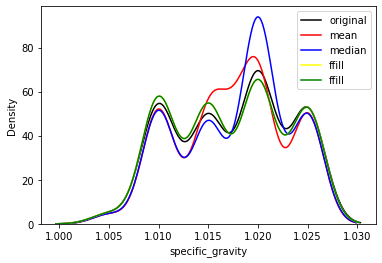

In [40]:
df1['sg_mean_impt'] = df1.specific_gravity.fillna(df1.specific_gravity.mean())
df1['sg_median_impt'] = df1.specific_gravity.fillna(df1.specific_gravity.median())
df1['ffill_sg'] = df1.specific_gravity.fillna(method='ffill')
df1['ffill_sg_new'] = df1.specific_gravity.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['specific_gravity'],color='black',label='original')
sns.kdeplot(df1['sg_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['sg_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_sg'], color='yellow', label='ffill')
sns.kdeplot(df1['ffill_sg_new'], color='green', label='ffill')
plt.legend()

In [41]:
df['specific_gravity'] = df1['ffill_sg']

### sugar

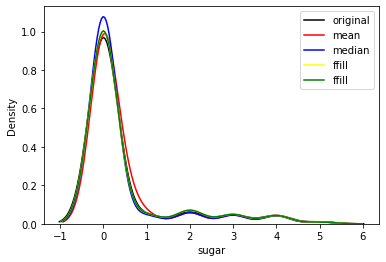

In [42]:
df1['su_mean_impt'] = df1.sugar.fillna(df1.sugar.mean())
df1['su_median_impt'] = df1.sugar.fillna(df1.sugar.median())
df1['ffill_su'] = df1.sugar.fillna(method='ffill')
df1['ffill_su_new'] = df1.sugar.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['sugar'],color='black',label='original')
sns.kdeplot(df1['su_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['su_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_su'], color='yellow', label='ffill')
sns.kdeplot(df1['ffill_su_new'], color='green', label='ffill')
plt.legend()

In [43]:
df['sugar'] = df1['ffill_su']

### haemoglobin

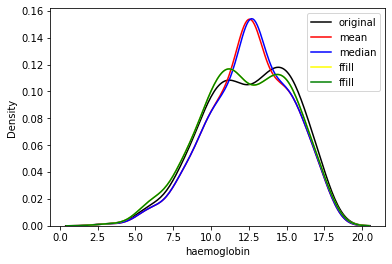

In [44]:
df1['ha_mean_impt'] = df1.haemoglobin.fillna(df1.haemoglobin.mean())
df1['ha_median_impt'] = df1.haemoglobin.fillna(df1.haemoglobin.median())
df1['ffill_ha'] = df1.haemoglobin.fillna(method='ffill')
df1['ffill_ha_new'] = df1.haemoglobin.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['haemoglobin'],color='black',label='original')
sns.kdeplot(df1['ha_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['ha_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_ha'], color='yellow', label='ffill')
sns.kdeplot(df1['ffill_ha_new'], color='green', label='ffill')
plt.legend()

In [45]:
df['haemoglobin'] = df1['ffill_ha_new']

### packed_cell_volume

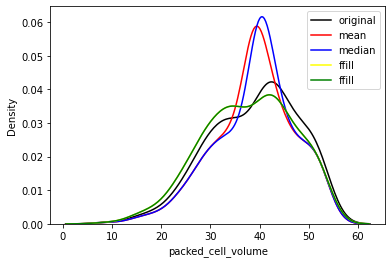

In [46]:
df1['pcv_mean_impt'] = df1.packed_cell_volume.fillna(df1.packed_cell_volume.mean())
df1['pcv_median_impt'] = df1.packed_cell_volume.fillna(df1.packed_cell_volume.median())
df1['ffill_pcv']= df1.packed_cell_volume.fillna(method='ffill')
df1['ffill_pcv_new'] = df1.packed_cell_volume.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['packed_cell_volume'],color='black',label='original')
sns.kdeplot(df1['pcv_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['pcv_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_pcv'], color='yellow', label='ffill')
sns.kdeplot(df1['ffill_pcv_new'], color='green', label='ffill')
plt.legend()

In [47]:
df['packed_cell_volume'] = df1['ffill_pcv_new']

### sodium

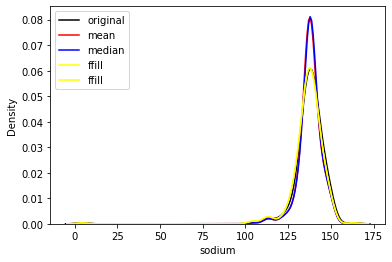

In [48]:
df1['sd_mean_impt'] = df1.sodium.fillna(df1.sodium.mean())
df1['sd_median_impt'] = df1.sodium.fillna(df1.sodium.median())
df1['ffill_sd']= df1.sodium.fillna(method='ffill')
df1['ffill_sd_new']= df1.sodium.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['sodium'],color='black',label='original')
sns.kdeplot(df1['sd_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['sd_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_sd'], color='yellow', label='ffill')
sns.kdeplot(df1['ffill_sd_new'], color='yellow', label='ffill')
plt.legend()

In [49]:
df['sodium'] = df1['ffill_sd']

### potassium

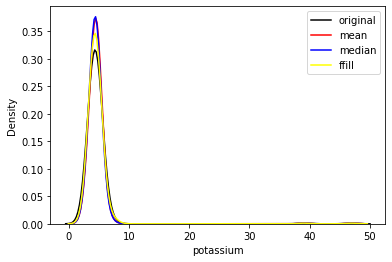

In [50]:
df1['pot_mean_impt'] = df1.potassium.fillna(df1.potassium.mean())
df1['pot_median_impt'] = df1.potassium.fillna(df1.potassium.median())
df1['ffill_pot']= df1.potassium.fillna(method='ffill')
df1['ffill_pot_new']= df1.potassium.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['potassium'],color='black',label='original')
sns.kdeplot(df1['pot_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['pot_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_pot'], color='yellow', label='ffill')
# sns.kdeplot(df1['ffill_pot_new'], color='green', label='ffill')
plt.legend()

In [51]:
df['potassium'] = df1['ffill_pot_new']

In [52]:
df['potassium'].dropna(inplace=True)
df['potassium'].isna().sum()

3

### white_blood_cell_count

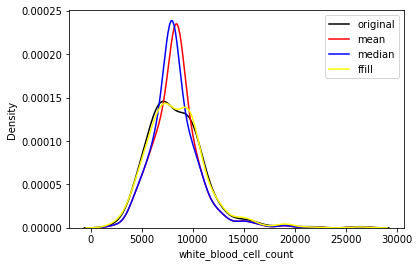

In [53]:
df1['wbc_mean_impt'] = df1.white_blood_cell_count.fillna(df1.white_blood_cell_count.mean())
df1['wbc_median_impt'] = df1.white_blood_cell_count.fillna(df1.white_blood_cell_count.median())
df1['ffill_wbc']= df1.white_blood_cell_count.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['white_blood_cell_count'],color='black',label='original')
sns.kdeplot(df1['wbc_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['wbc_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_wbc'], color='yellow', label='ffill')
plt.legend()

In [54]:
df['white_blood_cell_count'] = df1['ffill_wbc']

### red_blood_cell_count

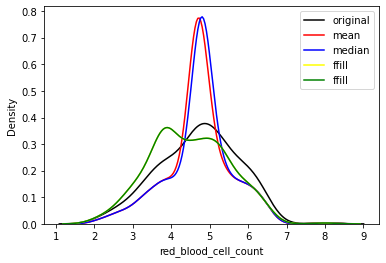

In [55]:
df1['rbc_mean_impt'] = df1.red_blood_cell_count.fillna(df1.red_blood_cell_count.mean())
df1['rbc_median_impt'] = df1.red_blood_cell_count.fillna(df1.red_blood_cell_count.median())
df1['ffill_rbc']= df1.red_blood_cell_count.fillna(method='ffill')
df1['ffill_rbc_new']= df1.red_blood_cell_count.fillna(method='ffill')

# plot the distribution of data of new columns using kde plot
sns.kdeplot(df1['red_blood_cell_count'],color='black',label='original')
sns.kdeplot(df1['rbc_mean_impt'], color='red', label='mean')
sns.kdeplot(df1['rbc_median_impt'], color='blue', label='median')
sns.kdeplot(df1['ffill_rbc'], color='yellow', label='ffill')
sns.kdeplot(df1['ffill_rbc_new'], color='green', label='ffill')
plt.legend()

In [56]:
df['red_blood_cell_count'] = df1['ffill_rbc']

## Data imputaion in categorical columns

In [57]:
df[cat_var].isna().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [58]:
df['red_blood_cells'].fillna(method='ffill', inplace=True)
df['pus_cell'].fillna(method='ffill', inplace=True)
df['pus_cell_clumps'].fillna(method='ffill', inplace=True)
df['bacteria'].fillna(method='ffill', inplace=True)

In [59]:
cat_var[4:]

['hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [60]:
for var in cat_var[4:]:
    df[var].fillna(df[var].mode()[0], inplace=True)

In [61]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            2
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     3
potassium                  3
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [62]:
df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0], inplace=True)

In [63]:
df['red_blood_cells'].isna().sum()

0

<AxesSubplot:xlabel='potassium', ylabel='Density'>

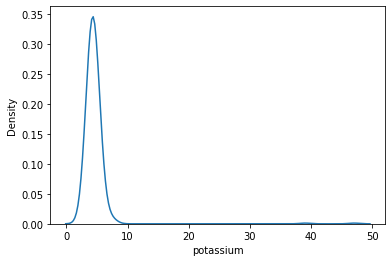

In [64]:
sns.kdeplot(df['potassium'])

In [65]:
df['sodium'].fillna(df['sodium'].mean(), inplace=True)
df['potassium'].fillna(df['potassium'].mean(), inplace=True)

<AxesSubplot:xlabel='potassium', ylabel='Density'>

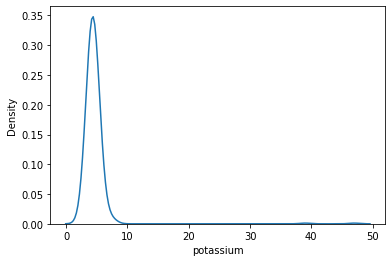

In [66]:
sns.kdeplot(df['potassium'])

In [67]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

### Check if the target data is balanced or not

<AxesSubplot:>

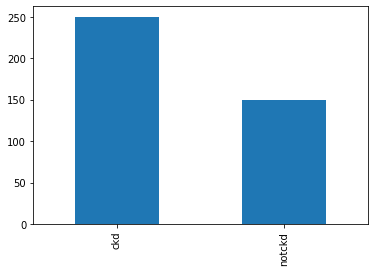

In [68]:
df['class'].value_counts().plot(kind='bar')

In [69]:
# Now lets see if our numeric features has outliers or not
num_var

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

C:\Users\poude\anaconda3\envs\tfEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\poude\anaconda3\envs\tfEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\poude\anaconda3\envs\tfEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

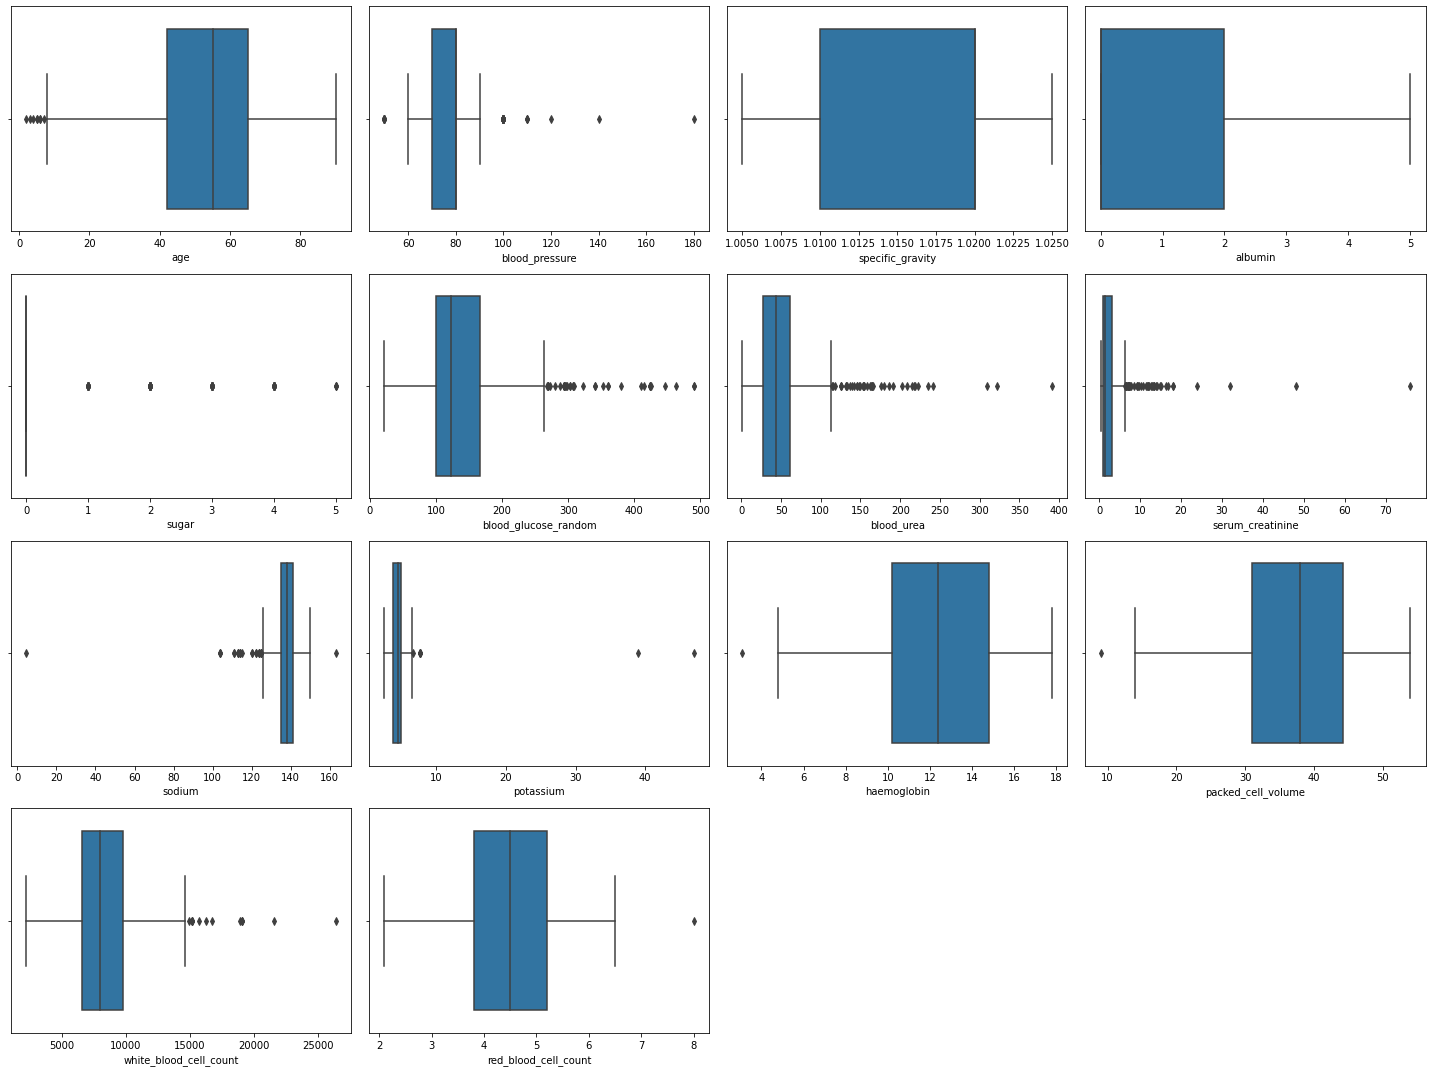

In [70]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for i in df[num_var]:
    if plotnumber <= len(num_var):
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[i])
    plotnumber += 1
plt.tight_layout()
plt.show()
        
# for var in cat_var:
#     if plotnumber <= len(cat_var):
#         ax = plt.subplot(3, 4, plotnumber)
#         df[var].value_counts().plot(kind='bar', stacked=True)
        
        
#     plotnumber += 1

# plt.tight_layout()
# plt.show()

### Converting categorical variables to numerical using LabelEncoder

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit_transform
df[cat_var] = df[cat_var].apply(le)

In [72]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [73]:
features = df.drop(columns=['class'])
target = df['class']

In [74]:
features.shape, target.shape

((400, 24), (400,))

In [75]:
features.corrwith(target)

age                       -0.225758
blood_pressure            -0.268956
specific_gravity           0.707973
albumin                   -0.610685
sugar                     -0.321908
red_blood_cells            0.474070
pus_cell                   0.420356
pus_cell_clumps           -0.265313
bacteria                  -0.186871
blood_glucose_random      -0.408891
blood_urea                -0.372033
serum_creatinine          -0.294079
sodium                     0.381391
potassium                 -0.068984
haemoglobin                0.755806
packed_cell_volume         0.728962
white_blood_cell_count    -0.200577
red_blood_cell_count       0.692472
hypertension              -0.590438
diabetes_mellitus         -0.559060
coronary_artery_disease   -0.236088
appetite                  -0.393341
peda_edema                -0.375154
aanemia                   -0.325396
dtype: float64

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.2)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 24), (80, 24), (320,), (80,))

In [99]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier().fit(X_train, y_train) 

In [100]:
y_pred = tree_clf.predict(X_test)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



As our data set is imbalanced, we'll have to set the `stratify` argument of `train_test_split` to `target` so that both the train and test sets <br> has the same the proportion of `class=0` ad `class=1`.

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=42, test_size=0.2)

In [103]:
y_pred = tree_clf.predict(X_test)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

